In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


c:\Users\zaber\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Loading Preprocessed Data
X_train = np.load("../data/X_train_processed.npy")
X_test = np.load("../data/X_test_processed.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

print("Preprocessed data loaded successfully:")
print("-" * 30)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

Preprocessed data loaded successfully:
------------------------------
X_train shape: (5625, 45)
X_test shape:  (1407, 45)
y_train shape: (5625,)
y_test shape:  (1407,)


In [3]:
# Converting Data Types
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

y_train = y_train.astype("int32")
y_test = y_test.astype("int32")

print("Data types after conversion:")
print(f"X_train dtype: {X_train.dtype}")
print(f"X_test dtype:  {X_test.dtype}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_test dtype:  {y_test.dtype}")

Data types after conversion:
X_train dtype: float32
X_test dtype:  float32
y_train dtype: int32
y_test dtype:  int32


In [4]:
# Defining Autoencoder Dimensions
input_dim = X_train.shape[1]
latent_dim = 16

print(f"Autoencoder input dimension: {input_dim}")
print(f"Latent (compressed) dimension: {latent_dim}")


Autoencoder input dimension: 45
Latent (compressed) dimension: 16


In [5]:
# Defining Encoder
input_layer = Input(shape=(input_dim,))

encoded = Dense(64, activation="relu")(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
latent = Dense(latent_dim, activation="relu")(encoded)

In [6]:
# Defining Decoder
decoded = Dense(64, activation="relu")(latent)
decoded = BatchNormalization()(decoded)

output_layer = Dense(input_dim, activation="linear")(decoded)

In [7]:
# Building Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compiling autoencoder to minimize reconstruction error
autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse"
)

# Model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 45)             │         2,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,509 (33.24 KB)

 Trainable params: 8,253 (32.24 KB)

 Non-trainable params: 256 (1.00 KB)

In [8]:
# Early Stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [9]:
# Training Autoencoder
history_ae = autoencoder.fit(
    X_train,
    X_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4800 - val_loss: 0.1815
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1524 - val_loss: 0.1133
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1246 - val_loss: 0.0960
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1126 - val_loss: 0.0849
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1026 - val_loss: 0.0754
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0943 - val_loss: 0.0674
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0877 - val_loss: 0.0604
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827 - val_loss: 0.0555
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0775 - val_loss: 0.0500
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0738 - val_loss: 0.0457
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0686 - val_loss: 0.0430
Epoch 12/100
141/141 ━━━━━━━━━━━━━━━━━━━━

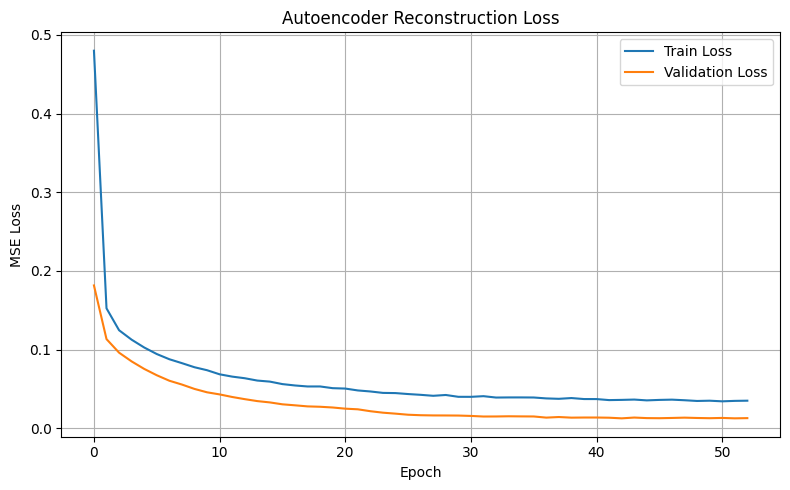

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history_ae.history["loss"], label="Train Loss")
plt.plot(history_ae.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Reconstruction Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Extracting Encoder Model
encoder = Model(inputs=input_layer, outputs=latent)

# Encoder summary
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,240 (16.56 KB)

 Trainable params: 4,112 (16.06 KB)

 Non-trainable params: 128 (512.00 B)

In [12]:
# Generate Latent Features
X_train_latent = encoder.predict(X_train)
X_test_latent = encoder.predict(X_test)

print("\nLatent feature generation complete:")
print("-" * 30)
print(f"X_train_latent shape: {X_train_latent.shape}")
print(f"X_test_latent shape:  {X_test_latent.shape}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step

Latent feature generation complete:
------------------------------
X_train_latent shape: (5625, 16)
X_test_latent shape:  (1407, 16)


In [13]:
# Training Classifier on Latent Features
lr_latent = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr_latent.fit(X_train_latent, y_train)

y_pred_latent = lr_latent.predict(X_test_latent)

Logistic Regression on Autoencoder Latent Features:
--------------------------------------------------
Accuracy: 0.7427
F1-score: 0.6157


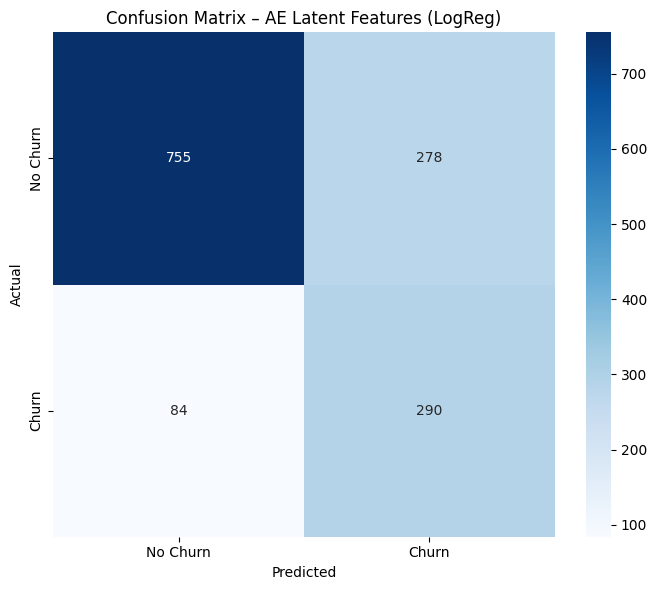

In [14]:
# Evaluating AE-Based Model
f1_latent = f1_score(y_test, y_pred_latent)
acc_latent = accuracy_score(y_test, y_pred_latent)

print("Logistic Regression on Autoencoder Latent Features:")
print("-" * 50)
print(f"Accuracy: {acc_latent:.4f}")
print(f"F1-score: {f1_latent:.4f}")

cm_latent = confusion_matrix(y_test, y_pred_latent)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_latent,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.title("Confusion Matrix – AE Latent Features (LogReg)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [15]:
# Baseline Comparison (Raw Features)
lr_raw = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr_raw.fit(X_train, y_train)

y_pred_raw = lr_raw.predict(X_test)

f1_raw = f1_score(y_test, y_pred_raw)
acc_raw = accuracy_score(y_test, y_pred_raw)

print("Logistic Regression on Raw Features:")
print("-" * 30)
print(f"Accuracy: {acc_raw:.4f}")
print(f"F1-score: {f1_raw:.4f}")

Logistic Regression on Raw Features:
------------------------------
Accuracy: 0.7257
F1-score: 0.6069


In [16]:
# Comparing Results
comparison = {
    "Feature Type": ["Raw Features", "Autoencoder Latent"],
    "F1-score": [f1_raw, f1_latent],
    "Accuracy": [acc_raw, acc_latent]
}

comparison_df = pd.DataFrame(comparison)

print("Comparison: Raw Features vs Autoencoder Latent Features")
print("-" * 50)
print(comparison_df)

Comparison: Raw Features vs Autoencoder Latent Features
--------------------------------------------------
         Feature Type  F1-score  Accuracy
0        Raw Features  0.606925  0.725657
1  Autoencoder Latent  0.615711  0.742715


In [17]:
# Saving Encoder Model
encoder.save("../data/encoder_model.keras")

print("Encoder model saved successfully.")
print("Saved path: ../data/encoder_model.keras")

Encoder model saved successfully.
Saved path: ../data/encoder_model.keras


### Autoencoder Summary

- An autoencoder was trained in an unsupervised manner on the training data to learn a compressed latent representation.
- The latent embeddings were used as input features for a logistic regression classifier.
- Performance using autoencoder features did not improve compared to raw features.
- This suggests that the original tabular feature space already captures the relevant structure for churn prediction.
